# Lecture 25: Decision Trees
## CMSE 381 - Fall 2022
## Nov 8, 2023

![](https://img.icons8.com/emoji/344/deciduous-tree-emoji.png)

In this module we are going to test out the tree based methods we discussed in class from Chapter 8.

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Fitting Regression Trees

We can now turn to setting up a basic regression tree. For this example, we're going to use the `Carseat` data where we will predict `Sales` from the rest of the columns. I'll do a bit of cleanup for you so we can get to the good stuff.

In [2]:
carseats = pd.read_csv('../../DataSets/Carseats.csv').drop('Unnamed: 0', axis=1)
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':0, 'Yes':1})
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [4]:
X = carseats.drop(['Sales'], axis = 1)
y = carseats.Sales
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


The regression tree function we will use is `DecisionTreeRegressor`. 

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [6]:
reg_tree = DecisionTreeRegressor(max_depth = 3)
reg_tree.fit(X,y)

DecisionTreeRegressor(max_depth=3)

We can draw the resulting tree to visualize what's happening. 

## Visualization 1: Text based

Ok, so not the prettiest of the options, but at least this one will work. This provides a text based tree where I can figure out what decisions were made at each step. 

In [7]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
print( tree.export_text(reg_tree, feature_names = list(X.columns)) )

|--- ShelveLoc <= 0.50
|   |--- Price <= 102.50
|   |   |--- Income <= 53.00
|   |   |   |--- value: [5.40]
|   |   |--- Income >  53.00
|   |   |   |--- value: [8.01]
|   |--- Price >  102.50
|   |   |--- Population <= 180.50
|   |   |   |--- value: [3.77]
|   |   |--- Population >  180.50
|   |   |   |--- value: [5.28]
|--- ShelveLoc >  0.50
|   |--- ShelveLoc <= 1.50
|   |   |--- Price <= 109.50
|   |   |   |--- value: [12.19]
|   |   |--- Price >  109.50
|   |   |   |--- value: [9.24]
|   |--- ShelveLoc >  1.50
|   |   |--- Price <= 105.50
|   |   |   |--- value: [8.80]
|   |   |--- Price >  105.50
|   |   |   |--- value: [6.56]



&#9989; **<font color=red>Do this:</font>**  Given a new data point with the entries below, use the visualization to determine the choices made by the decision tree at each step? What will your decision tree predict for `Sales`?

```
CompPrice      117
Income         100
Advertising      4
Population     466
Price           97
ShelveLoc        2
Age             55
Education       14
Urban            1
US               1
```

*Your answer here*

## Visualization 2: Probably should work 

Here's another option for visualization. There is a plotting function built into `sklearn.tree` but I've had issues with people's python versions before.  Let's try it and see, it's a bit clunky but it gets the job done. 

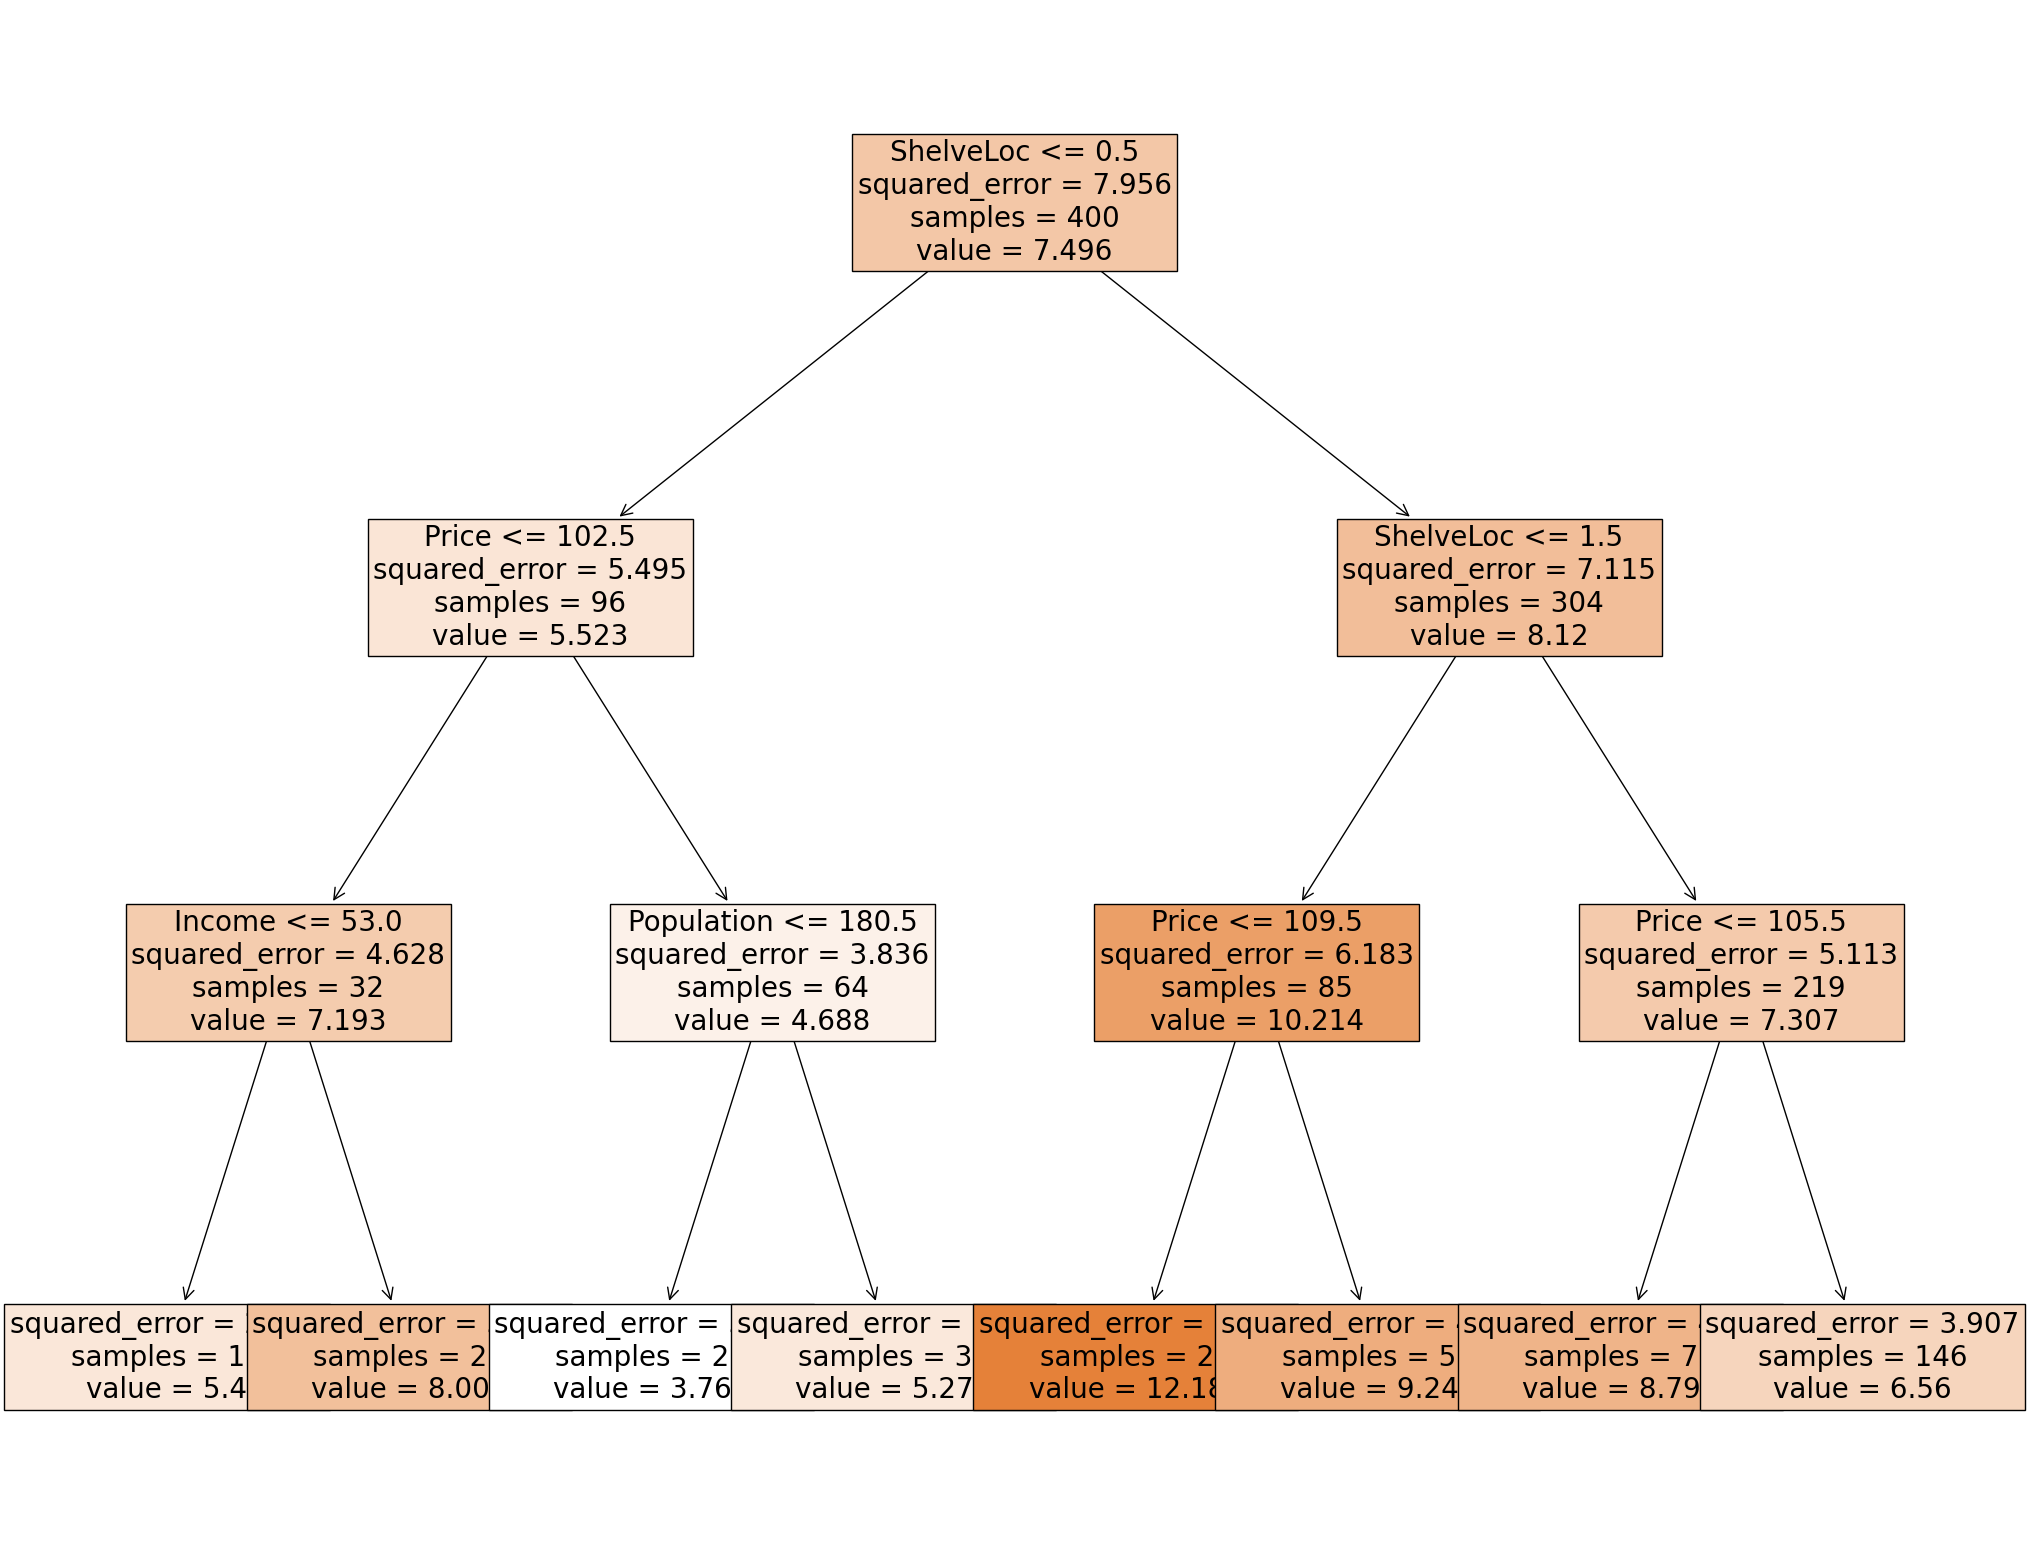

In [9]:
fig = plt.figure(figsize = (25,20))
_= tree.plot_tree(reg_tree, feature_names = X.columns, 
               filled = True, 
              fontsize = 20)

&#9989; **<font color=red>Do this:</font>** Given a new data point with the following entries, use the visualization to determine the choices made by the decision tree at each step? What will your decision tree predict for `Sales`?

```
CompPrice      141
Income          64
Advertising      3
Population     340
Price          128
ShelveLoc        0
Age             38
Education       13
Urban            1
US               0
```

*Your answer here*

## Other visualization tools. 

There are nicer visualization tools. In particular, the outputs requiring `graphviz` are quite a bit better than these options.  However, installing `graphviz` is non trivial so we won't use it in this lecture. Examples of code using this can be found [here](https://mljar.com/blog/visualize-decision-tree/).

## Predicting on the tree. 

As with all other `sklearn` packages we've seen, we can predict values on our input `X` matrix, and compare the results using MSE. 

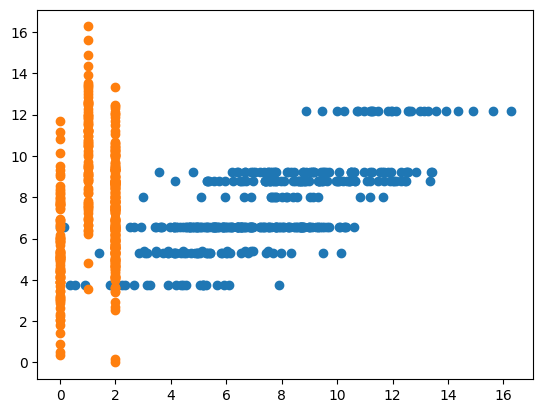

In [17]:
yhat = reg_tree.predict(X)
plt.scatter(y, yhat)

&#9989; **<font color=red>Do this:</font>** Use the regression tree you just built to predict the `Sales` value for the test set. 
- Check your answers from above.  The first data point example was the third row of  `X`; the second data point example was the fourth row. Do you get the same answer from the prediction as by hand with the visualization?
- What is the resulting MSE on the full data set?

In [ ]:
# Your code here #




![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# Classification trees

## Loading in the data 

Let's start with the `palmerPenguins` data set.  

In [23]:
!python -m pip install palmerpenguins

In [26]:
import palmerpenguins

In [27]:
penguins_df = palmerpenguins.load_penguins()

#I'm shuffling the data to make this a bit more interesting
penguins_df = penguins_df.sample(frac=1, random_state=1236) 

penguins_df = penguins_df.dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
259,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,male,2009
265,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,male,2009
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
290,Chinstrap,Dream,45.9,17.1,190.0,3575.0,female,2007
187,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,male,2008


In [28]:
X_df = pd.get_dummies(penguins_df.drop(columns = ['species']), drop_first = True)
X_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
259,53.4,15.8,219.0,5500.0,2009,0,0,1
265,51.5,16.3,230.0,5500.0,2009,0,0,1
50,39.6,17.7,186.0,3500.0,2008,0,0,0
290,45.9,17.1,190.0,3575.0,2007,1,0,0
187,48.4,16.3,220.0,5400.0,2008,0,0,1


In [29]:
y_df = penguins_df.species
y_df

259       Gentoo
265       Gentoo
50        Adelie
290    Chinstrap
187       Gentoo
         ...    
56        Adelie
28        Adelie
337    Chinstrap
331    Chinstrap
35        Adelie
Name: species, Length: 333, dtype: object

# Fitting Classification Trees 

We'll use `sklearn`'s built in modules for this. As always, the [user guide](https://scikit-learn.org/stable/modules/tree.html) is an excellent place to get started. 

Now to fit the decision tree classifier? All we need is two lines: 

In [30]:
from sklearn import tree 

In [31]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X_df, y_df)

&#9989; **<font color=red>Do this:</font>** Using the `.predict` function, what is the species predicted for the first five data points in `X`? Which of these predicted values are the same as the original labels?

In [34]:
# Your code here

clf_tree.predict(X_df[:5]), y_df[:5]


(array(['Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 259       Gentoo
 265       Gentoo
 50        Adelie
 290    Chinstrap
 187       Gentoo
 Name: species, dtype: object)

&#9989; **<font color=red>Do this:</font>** Use whichever visualization method you prefer from above to see the resulting tree. What is the sequence of decisions for predicting the first data point? 

In [ ]:
#your code here 


## Pruning the tree

The simplest method we have for pruning the tree is to limit the maximum depth, that is the number of times the tree is allowed to split. 

&#9989; **<font color=red>Do this:</font>** Change the value of `max_depth` below to see how the resulting tree changes.

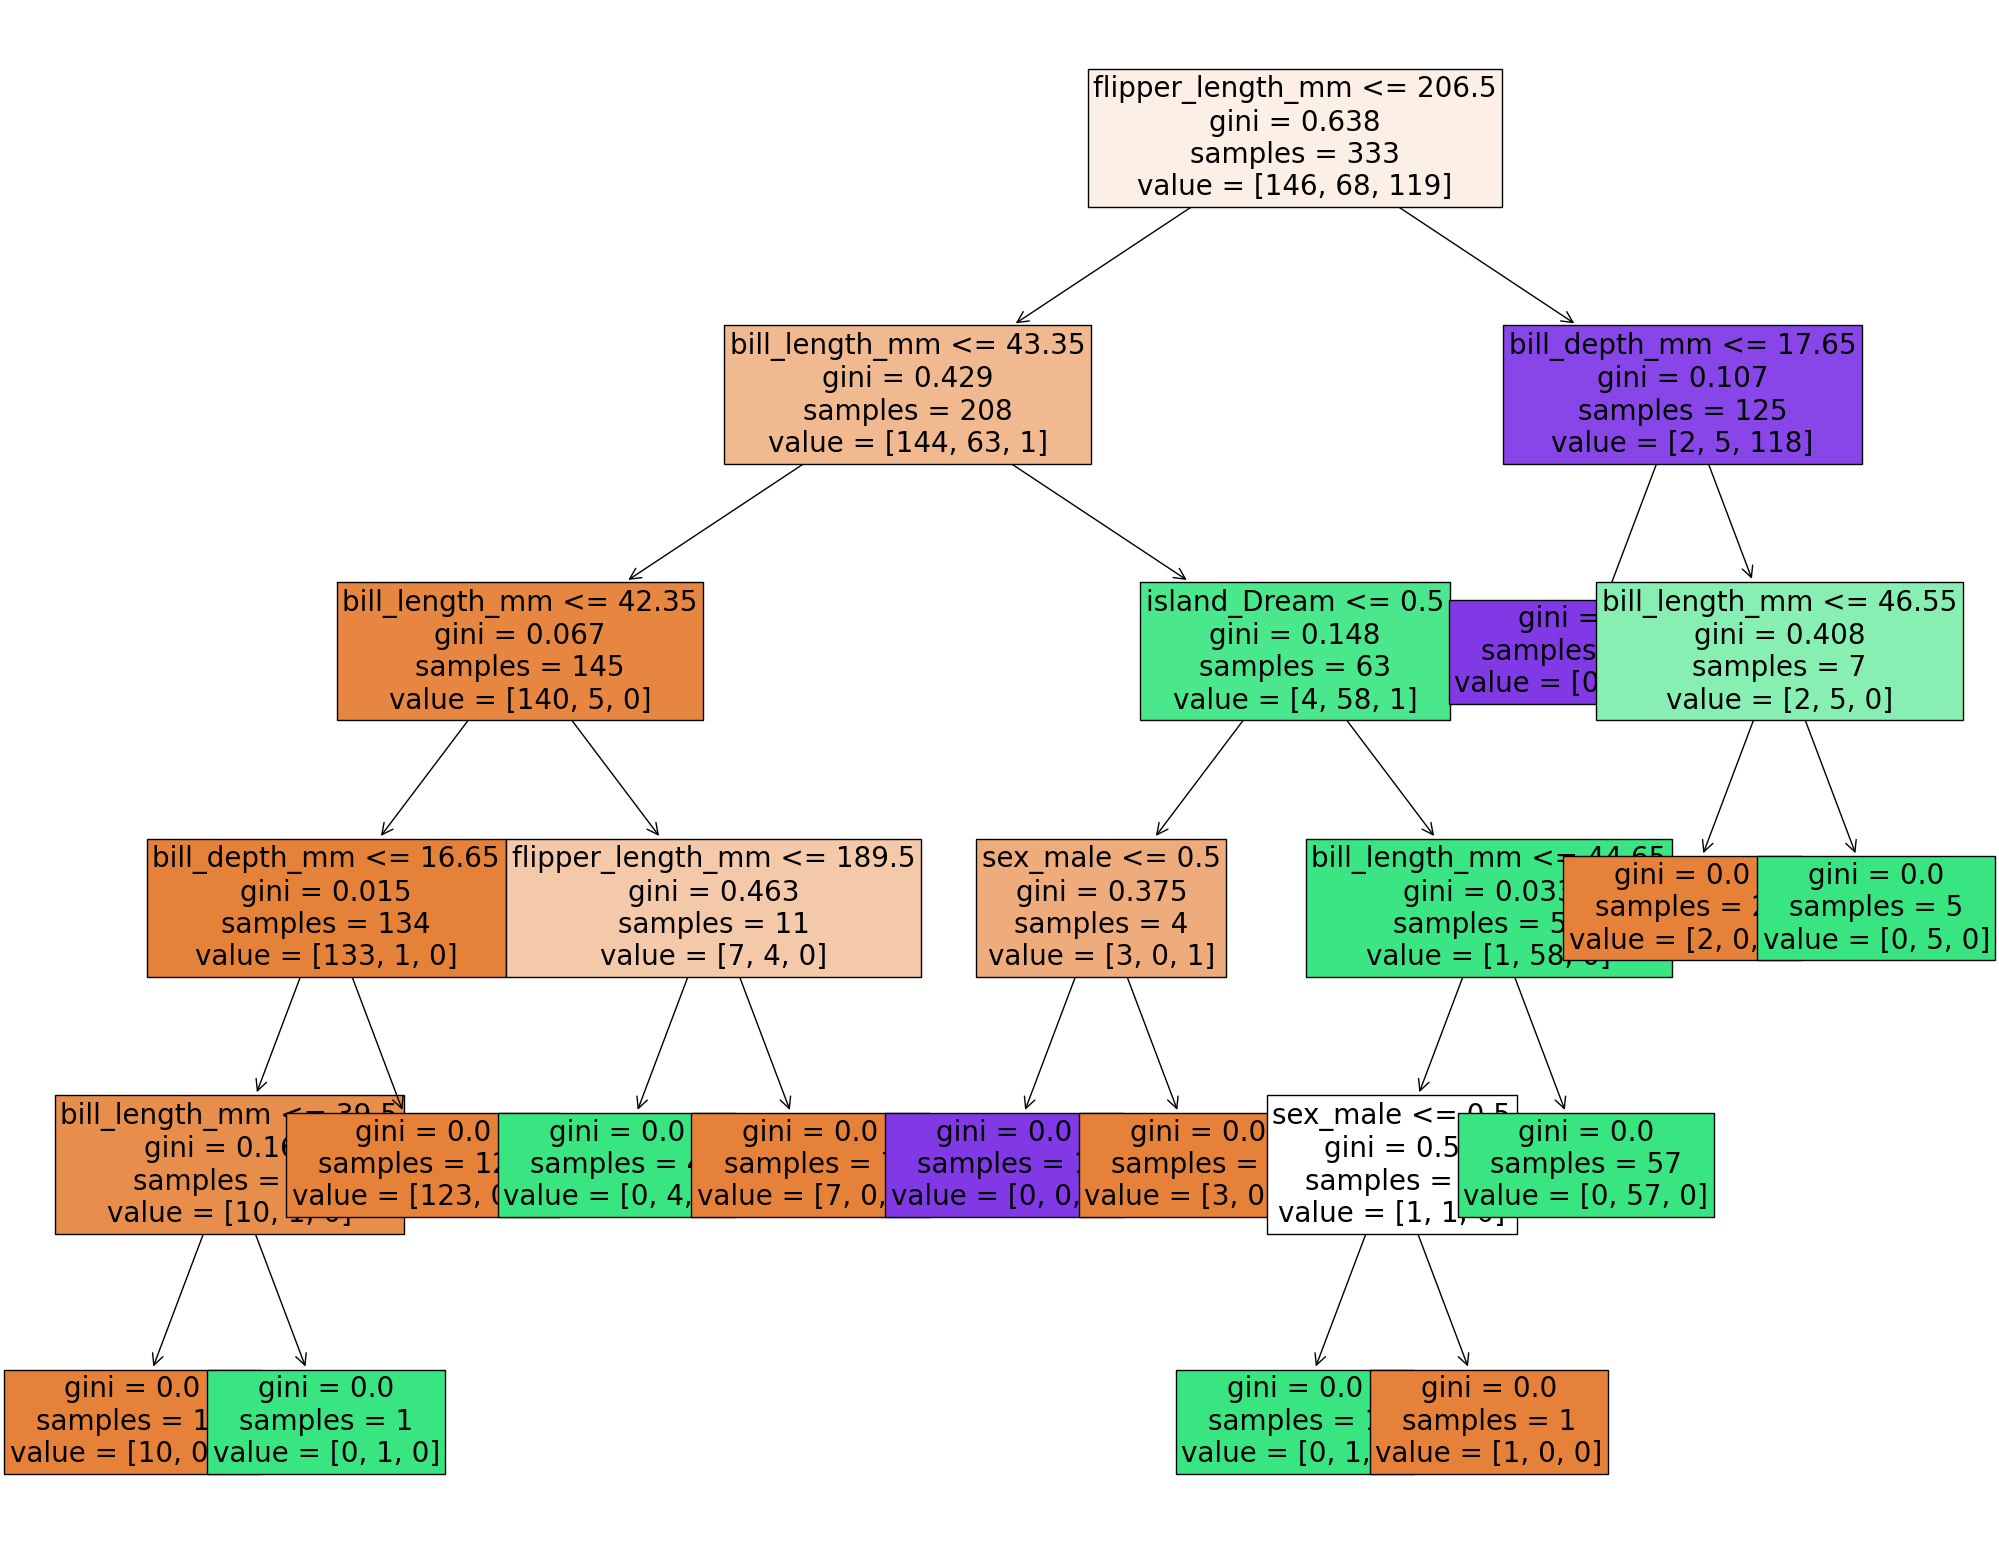

In [35]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 10) #<-- mess with this


clf_tree = clf_tree.fit(X_df, y_df)
fig = plt.figure(figsize = (25,20))
_= tree.plot_tree(clf_tree, feature_names = X_df.columns, 
               filled = True, 
              fontsize = 20)

If you are interested in more complex pruning techniques like we discussed in class, you can try to mess around with [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html), but I'll leave that for another day.

## Visualizing the parameter splits 
Now, if we want to visualize the parameter splits that are being represented with the trees, we can do that.  However, I can't (easily) draw these sorts of figures when I'm using more than two variables. Let's just grab the first two variables and build a classifer off of those. 

In [ ]:
X_pair = X_df[['bill_length_mm', 'bill_depth_mm']].values

clf_pair = tree.DecisionTreeClassifier(max_depth = 5).fit(X_pair, y_df)

&#9989; **<font color=red>Do this:</font>** Use whatever worked for you above to plot your decision tree. 

In [ ]:
# Your code here #

&#9989; **<font color=red>Do this:</font>** Below is some code that will draw the regions of parameter space that get each different prediction.  
- Which labels do the colors red, yellow, and blue match to? 
- What split in the figure does the first split in your tree above correspond to? 
- What changes in this figure if you change the `max_depth` in your tree model above?

In [ ]:
# Bounds for the figure 
x0_min = X[:,0].min()-1
x0_max = X[:,0].max()+1
x1_min = X[:,1].min()-1
x1_max = X[:,1].max()+1

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step)
)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])
def numReplace(label):
    if label == 'Adelie':
        return 0
    if label == 'Gentoo':
        return 1
    else: #(if 'Chinstrap')
        return 2
Z = np.array([numReplace(label) for label in Z])
# Z = Z.replace(['Adelie','Gentoo','Chinstrap'], [0,1,2])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(X_df.columns[0])
plt.ylabel(X_df.columns[1])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=['Adelie','Gentoo','Chinstrap'][i],
        edgecolor="black",
        s=15,
    )
plt.legend()



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.